In [1]:
import pandas as pd
import numpy as np
import os
import csv

## Creating dataframe

In [2]:
mags = [5.5, 6.5]
dists = [10, 100, 1000]
# idx = pd.MultiIndex.from_product([mags, dists, [0]], names=["mag", "rrup", "period", "medians"])

imts = ['SA(0.1)', 'PGA']
models = ['AkkarEtAl2008', 'CauzziEtAl2014']

from itertools import product
colz = list(product(['median'], imts, models))
colz = [('mag', '', ''), ('rrup', '', ''), ('period', '', '')] + colz

df = pd.DataFrame(np.random.randn(6, 7), columns=pd.MultiIndex.from_tuples(colz, names=['name', 'imt', 'model']))
display(df)

name        mag      rrup    period        median                 \
imt                                       SA(0.1)                  
model                               AkkarEtAl2008 CauzziEtAl2014   
0      0.545155  0.622717 -0.783415      0.062108       1.279864   
1     -0.154762  1.045295 -1.400185      1.459138      -1.150115   
2      0.212283  0.248935 -0.761943     -0.838238      -0.632401   
3      0.115162 -0.067061  0.131864      1.280487      -0.768331   
4     -0.338373 -0.086542 -2.450007     -0.051049       0.943355   
5     -2.159022  0.889443  0.085607     -0.196073      -1.091210   

name                                
imt             PGA                 
model AkkarEtAl2008 CauzziEtAl2014  
0         -0.414853       0.290270  
1          1.561160       1.510390  
2         -0.110344      -2.105361  
3         -0.297862      -0.329636  
4         -0.889226       0.078667  
5         -0.894450      -0.556169

### Accessing data

In [3]:
def show_data_access(df):
    from IPython.display import display, Markdown, Latex
    display(Markdown('**`df.mag`**'))
    display(df.mag)
    print()
    display(Markdown('**`df["median"]`**'))
    display(df["median"])
    print()
    display(Markdown('**`df["median"]["SA(0.1)"]`**'))
    display(df["median"]['SA(0.1)'])
    print()
    display(Markdown('**`df[(df.mag > 0)]`**'))
    display(df[(df.mag > 0)])
show_data_access(df)

**`df.mag`**

0    0.545155
1   -0.154762
2    0.212283
3    0.115162
4   -0.338373
5   -2.159022
Name: mag, dtype: float64

**`df["median"]`**

imt         SA(0.1)                          PGA               
model AkkarEtAl2008 CauzziEtAl2014 AkkarEtAl2008 CauzziEtAl2014
0          0.062108       1.279864     -0.414853       0.290270
1          1.459138      -1.150115      1.561160       1.510390
2         -0.838238      -0.632401     -0.110344      -2.105361
3          1.280487      -0.768331     -0.297862      -0.329636
4         -0.051049       0.943355     -0.889226       0.078667
5         -0.196073      -1.091210     -0.894450      -0.556169

**`df["median"]["SA(0.1)"]`**

model,AkkarEtAl2008,CauzziEtAl2014
0,0.062108,1.279864
1,1.459138,-1.150115
2,-0.838238,-0.632401
3,1.280487,-0.768331
4,-0.051049,0.943355
5,-0.196073,-1.091210


**`df[(df.mag > 0)]`**

name        mag      rrup    period        median                 \
imt                                       SA(0.1)                  
model                               AkkarEtAl2008 CauzziEtAl2014   
0      0.545155  0.622717 -0.783415      0.062108       1.279864   
2      0.212283  0.248935 -0.761943     -0.838238      -0.632401   
3      0.115162 -0.067061  0.131864      1.280487      -0.768331   

name                                
imt             PGA                 
model AkkarEtAl2008 CauzziEtAl2014  
0         -0.414853       0.290270  
2         -0.110344      -2.105361  
3         -0.297862      -0.329636

### Saving dataframe

In [4]:
show_data_access(dfr)

NameError: name 'dfr' is not defined

In [5]:
fout = os.path.join(os.getcwd(), 'pd_csv_egsim.csv')
print(fout)
df.to_csv(fout, index=True)
with open(fout, 'rt') as _:
    print(_.read())

/Users/rizac/work/gfz/projects/sources/python/notebook_workbench/pd_csv_egsim.csv
name,mag,rrup,period,median,median,median,median
imt,,,,SA(0.1),SA(0.1),PGA,PGA
model,,,,AkkarEtAl2008,CauzziEtAl2014,AkkarEtAl2008,CauzziEtAl2014
0,0.5451554606820922,0.6227171721917899,-0.7834150977717467,0.06210751272650153,1.2798639005038186,-0.41485273744548157,0.2902701589799901
1,-0.15476173439243696,1.0452946226029014,-1.4001848116112328,1.4591376125241633,-1.15011528779103,1.561159987572739,1.5103903610700382
2,0.21228301846371608,0.2489349067679021,-0.7619429732491801,-0.8382378535626982,-0.6324008569327568,-0.11034432718313748,-2.1053605126435344
3,0.11516232835297009,-0.0670608179951378,0.13186356200514388,1.2804869920593127,-0.76833130326063,-0.29786174392313236,-0.3296364679313031
4,-0.33837319070031874,-0.0865416176088646,-2.4500065724297433,-0.05104853717075305,0.9433547066074601,-0.8892259141302811,0.07866655491323968
5,-2.1590222841600024,0.8894426073940385,0.08560689421011886,-0.1960725

## Read dataframe

In [9]:
dfr = pd.read_csv(fout, header=[0, 1, 2], index_col=0).rename(columns=lambda c: "" if "Unnamed: " in c else c)
# Explanation:
# header: how many rows to use as header (first 3)
# index_col: which column to use as DataFrame index (the first column)
# rename: the CSV header has empty cells, pandas replaces them with custom strings ("Unnamed: ..."), we want to restore those empty cells
# (Note also that this way we can access dataframe['mag'] as a pandas Series, with non-empty cells it would be a DataFrame)
display(dfr)
dfr.columns

name        mag      rrup    period        median                 \
imt                                       SA(0.1)                  
model                               AkkarEtAl2008 CauzziEtAl2014   
0      0.545155  0.622717 -0.783415      0.062108       1.279864   
1     -0.154762  1.045295 -1.400185      1.459138      -1.150115   
2      0.212283  0.248935 -0.761943     -0.838238      -0.632401   
3      0.115162 -0.067061  0.131864      1.280487      -0.768331   
4     -0.338373 -0.086542 -2.450007     -0.051049       0.943355   
5     -2.159022  0.889443  0.085607     -0.196073      -1.091210   

name                                
imt             PGA                 
model AkkarEtAl2008 CauzziEtAl2014  
0         -0.414853       0.290270  
1          1.561160       1.510390  
2         -0.110344      -2.105361  
3         -0.297862      -0.329636  
4         -0.889226       0.078667  
5         -0.894450      -0.556169

MultiIndex([(   'mag',        '',               ''),
            (  'rrup',        '',               ''),
            ('period',        '',               ''),
            ('median', 'SA(0.1)',  'AkkarEtAl2008'),
            ('median', 'SA(0.1)', 'CauzziEtAl2014'),
            ('median',     'PGA',  'AkkarEtAl2008'),
            ('median',     'PGA', 'CauzziEtAl2014')],
           names=['name', 'imt', 'model'])

In [7]:
show_data_access(dfr)

**`df.mag`**

0    0.545155
1   -0.154762
2    0.212283
3    0.115162
4   -0.338373
5   -2.159022
Name: mag, dtype: float64

**`df["median"]`**

imt         SA(0.1)                          PGA               
model AkkarEtAl2008 CauzziEtAl2014 AkkarEtAl2008 CauzziEtAl2014
0          0.062108       1.279864     -0.414853       0.290270
1          1.459138      -1.150115      1.561160       1.510390
2         -0.838238      -0.632401     -0.110344      -2.105361
3          1.280487      -0.768331     -0.297862      -0.329636
4         -0.051049       0.943355     -0.889226       0.078667
5         -0.196073      -1.091210     -0.894450      -0.556169

**`df["median"]["SA(0.1)"]`**

model,AkkarEtAl2008,CauzziEtAl2014
0,0.062108,1.279864
1,1.459138,-1.150115
2,-0.838238,-0.632401
3,1.280487,-0.768331
4,-0.051049,0.943355
5,-0.196073,-1.091210


**`df[(df.mag > 0)]`**

name        mag      rrup    period        median                 \
imt                                       SA(0.1)                  
model                               AkkarEtAl2008 CauzziEtAl2014   
0      0.545155  0.622717 -0.783415      0.062108       1.279864   
2      0.212283  0.248935 -0.761943     -0.838238      -0.632401   
3      0.115162 -0.067061  0.131864      1.280487      -0.768331   

name                                
imt             PGA                 
model AkkarEtAl2008 CauzziEtAl2014  
0         -0.414853       0.290270  
2         -0.110344      -2.105361  
3         -0.297862      -0.329636

In [11]:
fout = os.path.join(os.getcwd(), 'pd_csv_egsim.hdf')
print(fout)
dfr.to_hdf(fout, key='trellis', format='table')
dfr = pd.read_hdf(fout)
display(dfr)

/Users/rizac/work/gfz/projects/sources/python/notebook_workbench/pd_csv_egsim.hdf


name        mag      rrup    period        median                 \
imt                                       SA(0.1)                  
model                               AkkarEtAl2008 CauzziEtAl2014   
0      0.545155  0.622717 -0.783415      0.062108       1.279864   
1     -0.154762  1.045295 -1.400185      1.459138      -1.150115   
2      0.212283  0.248935 -0.761943     -0.838238      -0.632401   
3      0.115162 -0.067061  0.131864      1.280487      -0.768331   
4     -0.338373 -0.086542 -2.450007     -0.051049       0.943355   
5     -2.159022  0.889443  0.085607     -0.196073      -1.091210   

name                                
imt             PGA                 
model AkkarEtAl2008 CauzziEtAl2014  
0         -0.414853       0.290270  
1          1.561160       1.510390  
2         -0.110344      -2.105361  
3         -0.297862      -0.329636  
4         -0.889226       0.078667  
5         -0.894450      -0.556169

In [13]:
show_data_access(dfr)

**`df.mag`**

0    0.545155
1   -0.154762
2    0.212283
3    0.115162
4   -0.338373
5   -2.159022
Name: mag, dtype: float64

**`df["median"]`**

imt         SA(0.1)                          PGA               
model AkkarEtAl2008 CauzziEtAl2014 AkkarEtAl2008 CauzziEtAl2014
0          0.062108       1.279864     -0.414853       0.290270
1          1.459138      -1.150115      1.561160       1.510390
2         -0.838238      -0.632401     -0.110344      -2.105361
3          1.280487      -0.768331     -0.297862      -0.329636
4         -0.051049       0.943355     -0.889226       0.078667
5         -0.196073      -1.091210     -0.894450      -0.556169

**`df["median"]["SA(0.1)"]`**

model,AkkarEtAl2008,CauzziEtAl2014
0,0.062108,1.279864
1,1.459138,-1.150115
2,-0.838238,-0.632401
3,1.280487,-0.768331
4,-0.051049,0.943355
5,-0.196073,-1.091210


**`df[(df.mag > 0)]`**

name        mag      rrup    period        median                 \
imt                                       SA(0.1)                  
model                               AkkarEtAl2008 CauzziEtAl2014   
0      0.545155  0.622717 -0.783415      0.062108       1.279864   
2      0.212283  0.248935 -0.761943     -0.838238      -0.632401   
3      0.115162 -0.067061  0.131864      1.280487      -0.768331   

name                                
imt             PGA                 
model AkkarEtAl2008 CauzziEtAl2014  
0         -0.414853       0.290270  
2         -0.110344      -2.105361  
3         -0.297862      -0.329636

### Example of plotting

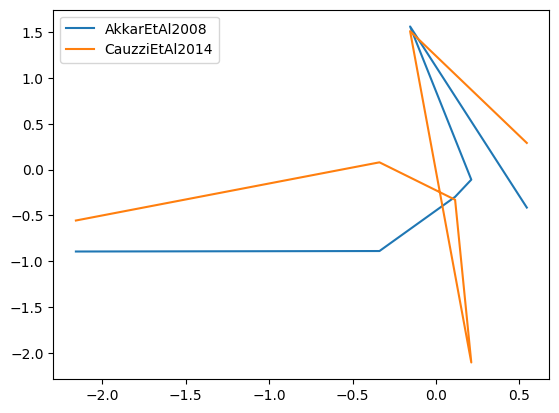

In [23]:
import matplotlib.pyplot as plt
# dfr['median']['PGA'].columns
plt.plot(dfr['mag'], dfr['median']['PGA'], label=dfr['median']['PGA'].columns)
plt.legend()

### To dict

In [84]:
dfr.iloc[0,0] = np.nan
dfr.iloc[1,0] = -np.inf
dfr.iloc[2,0] = np.inf
# display(dfr)

dest_dict = {}
for col in dfr.columns:
    vals = dfr[col].replace([-np.inf, np.inf], np.nan)
    nan = vals.isna()
    if nan.any():
        vals = vals.astype(object)
        vals[nan] = None
    vals = vals.to_list()
    # add columns up to the next-to-last one:
    sub_dest_dict = dest_dict
    for i, c in enumerate(col[:-1]):
        if not col[i+1]:
            break
        sub_dest_dict = sub_dest_dict.setdefault(c, {})
    sub_dest_dict[c] = vals

print(dest_dict)

{'mag': [None, None, None, 0.11516232835297, -0.3383731907003187, -2.1590222841600024], 'rrup': [0.6227171721917899, 1.0452946226029014, 0.2489349067679021, -0.0670608179951378, -0.0865416176088646, 0.8894426073940385], 'period': [-0.7834150977717467, -1.4001848116112328, -0.7619429732491801, 0.1318635620051438, -2.4500065724297437, 0.0856068942101188], 'median': {'SA(0.1)': {'SA(0.1)': [1.2798639005038186, -1.15011528779103, -0.6324008569327568, -0.76833130326063, 0.94335470660746, -1.09121032001621]}, 'PGA': {'PGA': [0.2902701589799901, 1.5103903610700382, -2.1053605126435344, -0.3296364679313031, 0.0786665549132396, -0.5561694612456459]}}}


In [63]:
help(pd.Series.to_list)

Help on function tolist in module pandas.core.base:

tolist(self)
    Return a list of the values.
    
    These are each a scalar type, which is a Python scalar
    (for str, int, float) or a pandas scalar
    (for Timestamp/Timedelta/Interval/Period)
    
    Returns
    -------
    list
    
    See Also
    --------
    numpy.ndarray.tolist : Return the array as an a.ndim-levels deep
        nested list of Python scalars.
    
    Examples
    --------
    For Series
    
    >>> s = pd.Series([1, 2, 3])
    >>> s.to_list()
    [1, 2, 3]
    
    For Index:
    
    >>> idx = pd.Index([1, 2, 3])
    >>> idx
    Index([1, 2, 3], dtype='int64')
    
    >>> idx.to_list()
    [1, 2, 3]



## Alternative way:
But this is more verbose

### Write with no index
```
fout = os.path.join(os.getcwd(), 'pd_csv_egsim.csv')
print(fout)
df.to_csv(fout, index=False)
with open(fout, 'rt') as _:
    print(_.read())
```

### Read back
(From https://stackoverflow.com/a/31326230)

```
dfr = pd.read_csv(fout, header=None, index_col=None)
```
#### Split first 3 rows (header) and the rest (data frame body):

```
columns, dfr = dfr.iloc[:3], dfr.iloc[3:]
```
#### Replace NaN (added by pandas by default) with emtpy strings:
```
columns = columns.fillna('')
```
#### set the new columns as multi-index ():
```
dfr.columns = pd.MultiIndex.from_arrays(columns.values, names=['name', 'imt', 'model'])
```
#### Make the DataFrame index (1 st column) start from 0 (and not 3):
```
dfr = dfr.reset_index(drop=True)
```
#### And set all data as float because it wasn't:
```
dfr = dfr.astype(float)
```